<a href="https://colab.research.google.com/github/carlosadaro28/VisualizacionCarlosAdaro/blob/main/Ejerciciosclase/Ejercicio2CarlosAdaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/datos_ejercicio_ventas.csv', delimiter=',')
data.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


## Preguntas de clase

In [14]:
# 1. Nº de actuals y AI_FORECAST (columna 'SCENARIO')
actuals = data[data['SCENARIO'] == 'actual'].shape[0]
forecasts = data[data['SCENARIO'] == 'AI_forecast'].shape[0]

print(f"Número de actuals: {actuals}")
print(f"Número de AI_FORECAST: {forecasts}")



Número de actuals: 900
Número de AI_FORECAST: 17766


In [15]:
# 2. Horizonte de predicción (basado en 'YEAR' y 'MONTH')

# Filtramos los datos para un producto y un país específicos y solo los que son 'AI_forecast' con un forecast específico
pais = 'Portugal'
producto = 'Lipton (L3)'
prediccion ='AI_P02F'
datos_filtrados = data[(data['COUNTRY'] == pais) &
                        (data['SUBBRAND'] == producto) &
                        (data['SCENARIO'] == 'AI_forecast')&
                         (data['FORECAST'] == prediccion)  ]


# Numeramos el número de filas en los datosfiltrados
num_datos = len(datos_filtrados)

# Mostramos el número de datos
print(f"El horizonte de prediccion de los productos es: {num_datos}")


El horizonte de prediccion de los productos es: 18


In [16]:
# 3. Nº de países ('COUNTRY') y productos ('SUBBRAND')
num_paises = data['COUNTRY'].nunique()
num_productos = data['SUBBRAND'].nunique()

print(f"Número de países: {num_paises}")
print(f"Número de productos: {num_productos}")

Número de países: 9
Número de productos: 6


In [17]:
# 4. Histórico de actuals e históricos de forecasts

#4.1 Histórico de actuals (país específico y escenario actual)

pais_concreto = 'Spain'
datos_pais = data[(data['COUNTRY'] == pais_concreto) & (data['SCENARIO'] == 'actual')]


# Verificamos que hay datos disponibles para el país y el escenario
if datos_pais.empty:
    print(f"No hay datos de ventas para {pais_concreto} en el escenario 'actuals'.")
else:
    # Encontramos el año mínimo y máximo
    ano_minimo = datos_pais['YEAR'].min()
    ano_maximo = datos_pais['YEAR'].max()

    # Filtrar los meses correspondientes al año mínimo
    meses_ano_minimo = datos_pais[datos_pais['YEAR'] == ano_minimo]['MONTH']
    mes_minimo = meses_ano_minimo.min()

    # Filtrar los meses correspondientes al año máximo
    meses_ano_maximo = datos_pais[datos_pais['YEAR'] == ano_maximo]['MONTH']
    mes_maximo = meses_ano_maximo.max()

    # Mostramos los resultados
    print(f"Primera venta en {pais_concreto}: {ano_minimo}-{mes_minimo}")
    print(f"Última venta en {pais_concreto}: {ano_maximo}-{mes_maximo}")


Primera venta en Spain: 2023-1
Última venta en Spain: 2024-8


In [18]:
# 4.2 Histórico de forecasts distintos


# Primero vamos a cambiar la variable mes de forecast a numerica.
forecast_num = {
    'AI_P02F': 1, 'AI_P03F': 2, 'AI_P04F': 3, 'AI_P05F': 4,
    'AI_P06F': 5, 'AI_P07F': 6, 'AI_P08F': 7, 'AI_P09F': 8,
    'AI_P10F': 9, 'AI_P11F': 10, 'AI_P12F': 11, 'AI_PF': 12
}
data['FORECAST'] = data['FORECAST'].map(forecast_num)
data.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,1.0,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,9.0,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,8.0,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,9.0,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,2.0,2023.0,396176.120491


In [19]:
# Filtramos para un país específico ya que el resto de paises siguen el mismo patrón y el escenario 'ai_forecast'

pais_concreto = 'Spain'
datos_forecast_pais = data[(data['COUNTRY'] == pais_concreto) & (data['SCENARIO'] == 'AI_forecast')]

if datos_forecast_pais.empty:
    print(f"No hay datos de ventas para {pais_concreto} en el escenario 'AI_forecast'.")
else:
    # Encontramos el año mínimo y máximo
    ano_minimo = datos_forecast_pais['FORECAST_YEAR'].min()
    ano_maximo = datos_forecast_pais['YEAR'].max()

    # Filtrar los meses correspondientes al año mínimo
    meses_ano_minimo = datos_forecast_pais[datos_forecast_pais['FORECAST_YEAR'] == ano_minimo]['FORECAST']
    mes_minimo = meses_ano_minimo.min()

    # Filtrar los meses correspondientes al año máximo
    meses_ano_maximo = datos_forecast_pais[datos_forecast_pais['YEAR'] == ano_maximo]['MONTH']
    mes_maximo = meses_ano_maximo.max()

    print(f"Primera predicción en {pais_concreto}: {int(ano_minimo)}-{int(mes_minimo)}")
    print(f"Última predicción  en {pais_concreto} será en: {int(ano_maximo)}-{int(mes_maximo)}")



Primera prediccion  de ventas en Spain: 2023-1
Última predicción de ventas  en Spain será en: 2025-5


# Preguntas solicitadas Práctica

## 1. Como se distribuyen las ventas realizadas en:
• Cada país

• Cada mes y año

• Cada marca



Distribución de ventas por país:
COUNTRY
Czech            6.384946e+08
Denmark          3.173959e+09
Great Britain    8.427775e+09
Hungary          1.104465e+09
Italy            5.058963e+08
Netherlands      1.831524e+09
Norway           1.858965e+09
Portugal         3.871816e+08
Spain            2.184936e+08
Name: AMOUNT, dtype: float64


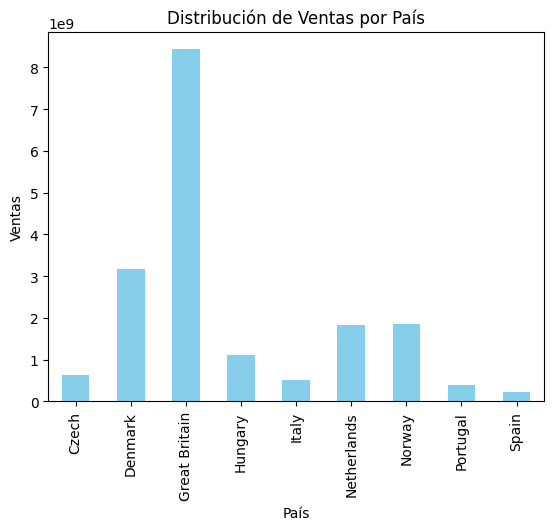

In [20]:
#1.1 Como se distribuyen las ventas realizadas en cada país

# Agrupamos por país y sumamos las ventas
ventas_por_pais = data.groupby('COUNTRY')['AMOUNT'].sum()

# Mostramos la distribución de las ventas por país
print("Distribución de ventas por país:")
print(ventas_por_pais)

# Visualización en un gráfico de barras
import matplotlib.pyplot as plt
ventas_por_pais.plot(kind='bar', title='Distribución de Ventas por País', ylabel='Ventas', xlabel='País', color='skyblue')
plt.show()

Con esta gráfica podemos observar que el país con más ventas es Gran Bretaña y el de menor número de ventas es España

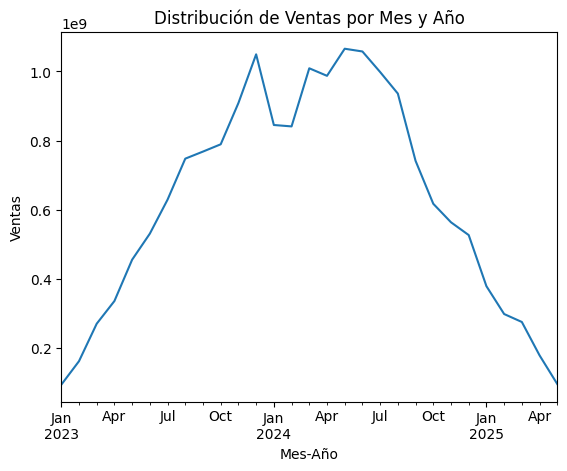

In [24]:
#1.2 Como se distribuyen las ventas realizadas en cada mes

# Creamos una columna 'YEAR_MONTH' combinando año y mes para facilitar el análisis temporal
data['YEAR_MONTH'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str))

# Agrupamos por 'YEAR_MONTH' y sumamos las ventas
ventas_por_mes_año = data.groupby('YEAR_MONTH')['AMOUNT'].sum()

# Visualizamos la distribución temporal
# Graficamos la serie de tiempo con los valores de ventas
ventas_por_mes_año.plot(kind='line', title='Distribución de Ventas por Mes y Año', ylabel='Ventas', xlabel='Mes-Año')
plt.show()

Con el gráfico podemos comprobar que no tenemos un patrón fijo pero suele haber menos ventas entre los meses de diciembre y marzo/abril.

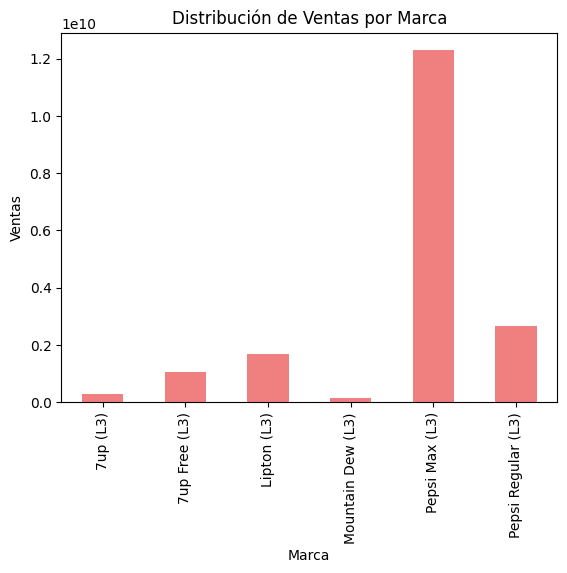

In [22]:
#1.3 Como se distribuyen las ventas realizadas en cada marca

# Agrupamos por marca y sumamos las ventas
ventas_por_marca = data.groupby('SUBBRAND')['AMOUNT'].sum()

# Visualización en un gráfico de barras
ventas_por_marca.plot(kind='bar', title='Distribución de Ventas por Marca', ylabel='Ventas', xlabel='Marca', color='lightcoral')
plt.show()


Podemos confirmar que la marca más vendida es Pepsi Max y la que menos vende es Mountain Dew.

#2. Cual es la tendencia y estacionalidad de:
• Todas las ventas del país con menos ventas

• La marca con más ventas




2.1 Tendencia y estacionalidad del país con menos ventas

Debido al análisis previo de la ventas por país sabemos que el país con menos ventas se trata de España.

<ipython-input-42-e5516b6a690f>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



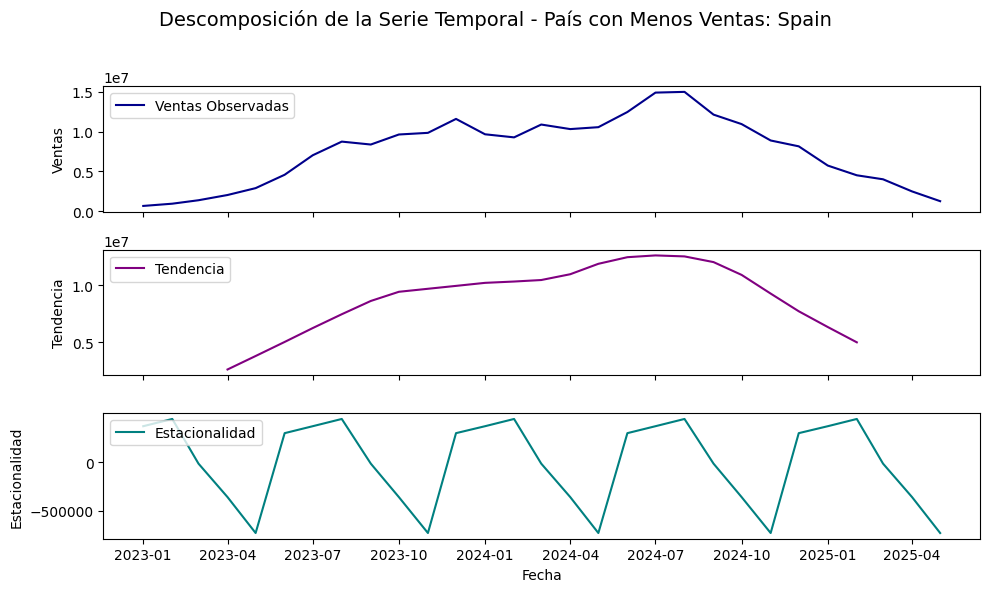

In [42]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Filtramos los datos directamente para el país con menos ventas, 'Spain'
datos_espana = data[data['COUNTRY'] == 'Spain']

# Creamos una columna de fecha combinando año y mes
datos_espana['FECHA'] = pd.to_datetime(datos_espana[['YEAR', 'MONTH']].assign(DAY=1))

# Agruparemos las ventas por fecha (mes y año)
ventas_espana = datos_espana.groupby('FECHA')['AMOUNT'].sum()

# Asegurarnos de que la serie sea de frecuencia mensual
ventas_espana = ventas_espana.asfreq('MS')

# Descomposición de la serie temporal con un periodo de 6 meses
descomposicion_espana = seasonal_decompose(ventas_espana, model='additive', period=6)

# Visualización de los componentes descompuestos
fig, (grafico1, grafico2, grafico3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Descomposición de la Serie Temporal - País con Menos Ventas: Spain', fontsize=14)

# Serie original
grafico1.plot(ventas_espana, label='Ventas Observadas', color='darkblue')
grafico1.legend(loc='upper left')
grafico1.set_ylabel('Ventas')

# Tendencia
grafico2.plot(descomposicion_espana.trend, label='Tendencia', color='purple')
grafico2.legend(loc='upper left')
grafico2.set_ylabel('Tendencia')

# Estacionalidad
grafico3.plot(descomposicion_espana.seasonal, label='Estacionalidad', color='teal')
grafico3.legend(loc='upper left')
grafico3.set_ylabel('Estacionalidad')

# Etiqueta del eje x
plt.xlabel('Fecha')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




- Tendencia:
La tendencia muestra que las ventas en España tienden a aumentar durante los primeros meses del año, alcanzando su punto máximo en verano, y luego disminuyen en los meses de invierno. Esto resulta lógico, considerando que los productos asociados a estas ventas son principalmente bebidas deportivas. Durante el invierno, con temperaturas más bajas, es común que disminuya la actividad deportiva al aire libre, lo que podría influir en la caída de las ventas.

- Estacionalidad:
La estacionalidad revela un patrón recurrente en periodos de aproximadamente seis meses, lo cual sugiere que las ventas en España están influenciadas por factores estacionales. Es probable que la demanda aumente en primavera y verano, cuando las actividades deportivas al aire libre son más frecuentes, y disminuya en otoño e invierno, confirmando una relación con las estaciones del año y la variación en la actividad deportiva.

2.2 Tendencia y estacionalidad de la marca con más ventas

Debido al análisis previo de la ventas por marca sabemos que la marca con más ventas se trata de Pepsi Max.

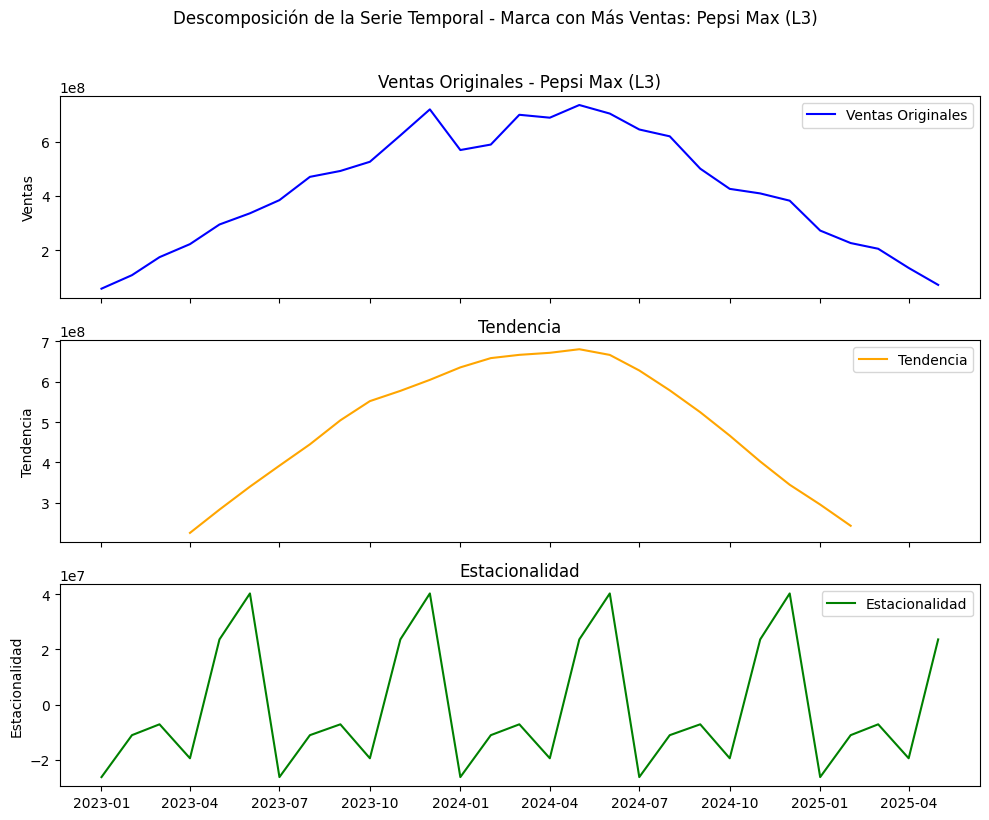

In [34]:
# Filtramos los datos para la marca con más ventas, "Pepsi Max (L3)"
data_pepsi_max = data[data['SUBBRAND'] == 'Pepsi Max (L3)']

# Agrupamos y convertiremos en serie temporal
ventas_pepsi_max = data_pepsi_max.groupby('YEAR_MONTH')['AMOUNT'].sum()
ventas_pepsi_max.index = pd.to_datetime(ventas_pepsi_max.index)
ventas_pepsi_max = ventas_pepsi_max.asfreq('MS')  # Frecuencia de inicio de mes

# Descomponemos la serie temporal con un periodo de 6 meses
result_pepsi_max = seasonal_decompose(ventas_pepsi_max, model='additive', period=6)

# Visualizamos la descomposición con 'Matplotlib'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Serie original
ax1.plot(ventas_pepsi_max, color='blue')
ax1.set_title('Ventas Originales - Pepsi Max (L3)')
ax1.set_ylabel('Ventas')
ax1.legend(['Ventas Originales'])

# Tendencia
ax2.plot(result_pepsi_max.trend, color='orange')
ax2.set_title('Tendencia')
ax2.set_ylabel('Tendencia')
ax2.legend(['Tendencia'])

# Estacionalidad
ax3.plot(result_pepsi_max.seasonal, color='green')
ax3.set_title('Estacionalidad')
ax3.set_ylabel('Estacionalidad')
ax3.legend(['Estacionalidad'])

plt.suptitle('Descomposición de la Serie Temporal - Marca con Más Ventas: Pepsi Max (L3)', y=1.02)
plt.tight_layout()
plt.show()


- Tendencia:
La tendencia en las ventas de Pepsi Max (L3) muestra un crecimiento sostenido desde el inicio del período hasta alcanzar un máximo intermedio. Este punto máximo se observa en la mitad del intervalo temporal analizado, seguido de una desaceleración que culmina en una caída hacia los meses finales. Este comportamiento sugiere que Pepsi Max (L3) mantiene una alta demanda durante gran parte del año, pero experimenta una reducción en ventas en los últimos meses, posiblemente debido a factores de mercado o estacionales que afectan la demanda del producto.

- Estacionalidad:
La descomposición estacional revela un patrón repetitivo cada seis meses, lo cual sugiere que las ventas de Pepsi Max (L3) se ven afectadas por factores estacionales. Este comportamiento podría estar influenciado por campañas promocionales, eventos específicos o cambios de estación que estimulan la demanda en ciertos meses. Por ejemplo, es posible que el consumo de esta bebida aumente en épocas de clima cálido o durante festividades y vacaciones, donde las ventas de refrescos suelen ser mayores.

#3. Cuales son las predicciones hechas en España y como de buenas son.


In [39]:
import pandas as pd
import plotly.graph_objects as go

# Filtramos datos específicos para España
ventas_espana = data.query("COUNTRY == 'Spain'").copy()

# Separamos los datos en escenarios actuales y de predicción
ventas_actuales = ventas_espana[ventas_espana['SCENARIO'] == 'actual'].copy()
ventas_forecast = ventas_espana[ventas_espana['SCENARIO'] == 'AI_forecast'].copy()

# Creamos una columna de fecha para ambos conjuntos de datos
ventas_actuales['FECHA'] = pd.to_datetime(ventas_actuales[['YEAR', 'MONTH']].assign(DAY=1))
ventas_forecast['FECHA_FORECAST'] = pd.to_datetime(ventas_forecast[['YEAR', 'MONTH']].assign(DAY=1))
ventas_forecast['FECHA'] = pd.to_datetime(ventas_forecast[['YEAR', 'MONTH']].assign(DAY=1))

# Agruparemos las ventas actuales por fecha
ventas_reales = ventas_actuales.groupby('FECHA')['AMOUNT'].sum().reset_index()

# Extraemos combinaciones únicas de año y mes de inicio de las predicciones
inicio_prediccion = ventas_forecast[['FORECAST_YEAR', 'FORECAST']].drop_duplicates()

# Generaremos un gráfico para cada inicio de predicción
for _, fila in inicio_prediccion.iterrows():
    anio_inicio = int(fila['FORECAST_YEAR'])
    mes_inicio = int(fila['FORECAST'])

    # También filtraremos la predicción específica de acuerdo al inicio
    prediccion_seleccionada = ventas_forecast[
        (ventas_forecast['FORECAST_YEAR'] == anio_inicio) &
        (ventas_forecast['FORECAST'] == mes_inicio)
    ]

    # Agruparemos la predicción por fecha
    ventas_prediccion = prediccion_seleccionada.groupby('FECHA')['AMOUNT'].sum().reset_index()

    # Creamos el gráfico
    figura = go.Figure()

    # Añadiremos las ventas reales al gráfico
    figura.add_trace(go.Scatter(
        x=ventas_reales['FECHA'],
        y=ventas_reales['AMOUNT'],
        mode='lines+markers',
        name='Ventas Reales',
        line=dict(color='purple', width=2)
    ))

    # Añadimos las predicciones
    figura.add_trace(go.Scatter(
        x=ventas_prediccion['FECHA'],
        y=ventas_prediccion['AMOUNT'],
        mode='lines+markers',
        name=f'Forecast (Inicio: {mes_inicio}-{anio_inicio})',
        line=dict(dash='dot', color='green')
    ))

    # Configuración del diseño del gráfico
    figura.update_layout(
        title=f'Comparativa de Ventas Reales vs. Forecast (Inicio: {mes_inicio}-{anio_inicio})',
        xaxis_title='Fecha',
        yaxis_title='Volumen de Ventas',
        legend=dict(orientation="h", yanchor="top", y=1.1, xanchor="center", x=0.5),
        template="ggplot2"
    )

    figura.show()


Podemos comprobar que exceptuando algunos meses (por ejemplo 2-2023, 12-2023, 1-2023) las ventas no se parecen mucho a nuestras predicciones, esto se debe a que podemos encontrar ciertos datos repetidos para mismos forecasts o momentos. Si pensamos en eliminarlos, podríamos asemejarnos más a una trayectoria parecida con un acercamiento a las ventas actuales, por lo tanto podemos decir por ahora con lo que hemos estado analizando que las predicciones no son muy buenas.